In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [215]:
#Read the csv file into a data frame
df = pd.read_csv('A2Z_insurance.csv')

In [216]:
df = df.rename(columns={'Customer Identity':'ID','First Policy´s Year':'First_Policy','Brithday Year':'Birthday','Educational Degree':'Education','Gross Monthly Salary':'Salary','Geographic Living Area':'Area','Has Children (Y=1)':'Children','Customer Monetary Value':'CMV','Claims Rate':'Claims','Premiums in LOB: Motor':'Motor','Premiums in LOB: Household':'Household','Premiums in LOB: Health':'Health','Premiums in LOB:  Life':'Life','Premiums in LOB: Work Compensations':'Work_Compensation'})

First problems:
    - people: too young / too old
    - customer monetary value: min negative

In [217]:
df.columns

Index(['ID', 'First_Policy', 'Birthday', 'Education', 'Salary', 'Area',
       'Children', 'CMV', 'Claims', 'Motor', 'Household', 'Health', 'Life',
       'Work_Compensation'],
      dtype='object')

In [209]:
print(df.Salary.sum())
print(df.CMV.sum())

25718404.0
1831582.26


In [210]:
df_premiums = df[['Motor', 'Household', 'Health', 'Life', 'Work_Compensation']]
df_premiums_sum = df_premiums.sum().sum()

In [211]:
claim_rate = df['Claims'].sum().sum()
claim_rate

7647.58

In [212]:
print(claim_rate * df_premiums_sum)

60089185871.21386


In [213]:
print(df["First_Policy"].mean())
df_fpolicy_mean = round(df["First_Policy"].mean())
print(df_fpolicy_mean)
print(df['First_Policy'].isnull().sum())
df_fpolicy = df['First_Policy'].fillna(df_fpolicy_mean)
df_fpolicy.to_frame()
# check if there are nulls left
df_fpolicy.isnull().sum()

1991.0626339372686
1991
30


0

In [177]:
df_birth_mean = round(df["Birthday"].mean())
df['Birthday'] = df['Birthday'].fillna(df_birth_mean)

df_fpolicy_mean = round(df["First_Policy"].mean())
df['First_Policy'] = df['First_Policy'].fillna(df_fpolicy_mean)

df['Motor']= df['Motor'].fillna(0)
df['Health'] = df['Health'].fillna(0)
df['Life'] = df['Life'].fillna(0)
df["Work_Compensation"] = df["Work_Compensation"].fillna(0)

#Replacing the NaN values of Has Children column based on their birthday date
df.loc[296, 'has_children'] = '1.0'
df.loc[619, 'has_children'] = '0.0'
df.loc[772, 'has_children'] = '1.0'
df.loc[2227, 'has_children'] = '1.0'
df.loc[2362, 'has_children'] = '1.0'
df.loc[2671, 'has_children'] = '1.0'
df.loc[2703, 'has_children'] = '1.0'
df.loc[2926, 'has_children'] = '1.0'
df.loc[3177, 'has_children'] = '1.0'
df.loc[3280, 'has_children'] = '1.0'
df.loc[3684, 'has_children'] = '1.0'
df.loc[4728, 'has_children'] = '1.0'
df.loc[5437, 'has_children'] = '1.0'
df.loc[6471, 'has_children'] = '1.0'
df.loc[6863, 'has_children'] = '0.0'
df.loc[7474, 'has_children'] = '1.0'
df.loc[8018, 'has_children'] = '1.0'
df.loc[8374, 'has_children'] = '0.0'
df.loc[8419, 'has_children'] = '1.0'
df.loc[9324, 'has_children'] = '1.0'
df.loc[10010, 'has_children'] = '1.0'

In [178]:
df.isnull().sum()

ID                       0
First_Policy             0
Birthday                 0
Education               17
Salary                  36
Area                     1
Children                21
CMV                      0
Claims                   0
Motor                    0
Household                0
Health                   0
Life                     0
Work_Compensation        0
has_children         10275
dtype: int64

In [218]:
df = df.dropna()

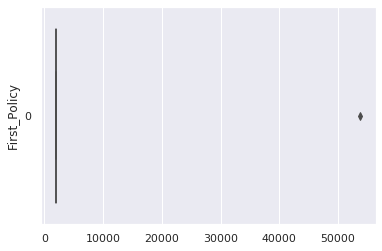

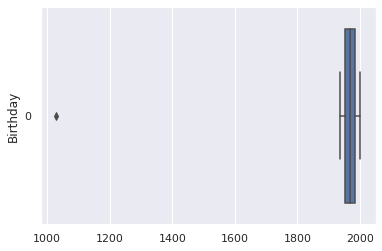

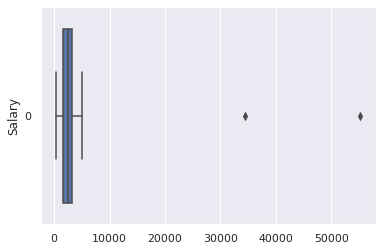

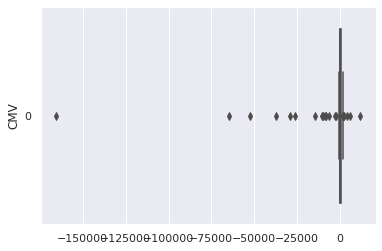

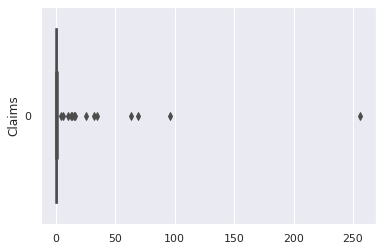

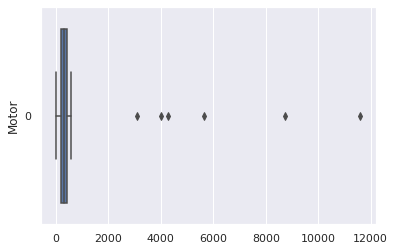

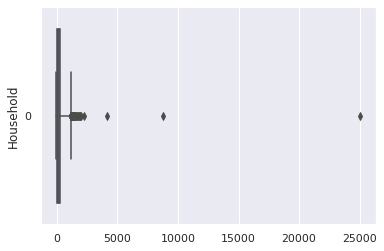

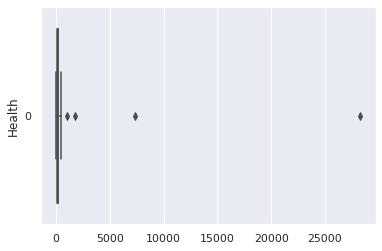

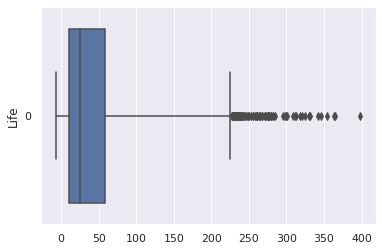

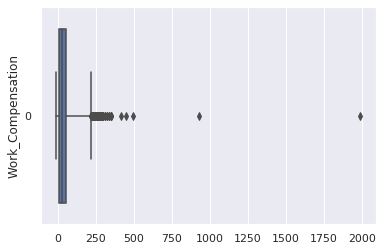

In [219]:
#for col in df:
col = ['First_Policy', 'Birthday', 'Salary', 'CMV', 'Claims', 'Motor', 'Household', 'Health', 'Life', 'Work_Compensation']

for col in col:

    sns.boxplot(data = df[col], orient = "h", whis = 3.5)
    plt.ylabel(col)
    plt.show()
    
    

In [181]:
df.head()

,ID,First_Policy,Birthday,Education,Salary,Area,Children,CMV,Claims,Motor,Household,Health,Life,Work_Compensation,has_children
0,1,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,NaN
1,2,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,NaN
2,3,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,NaN
3,4,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,NaN
4,5,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,NaN


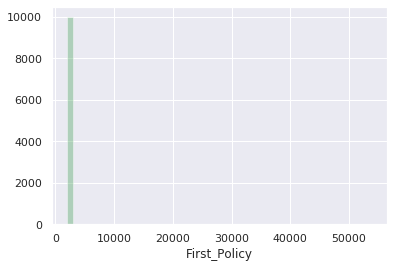

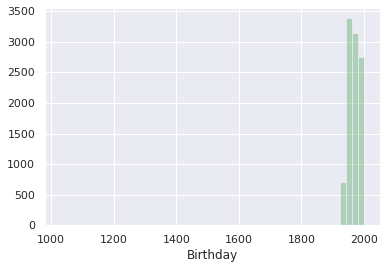

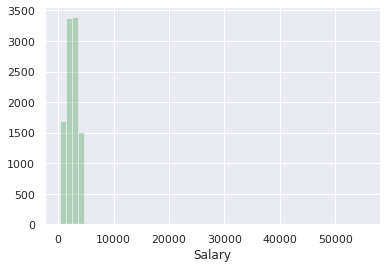

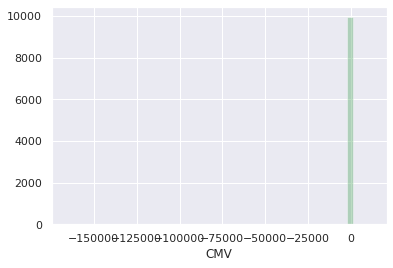

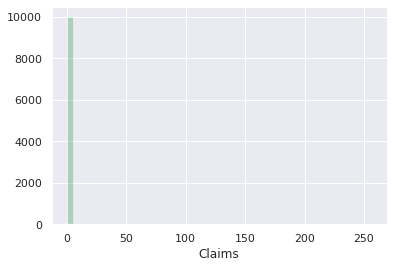

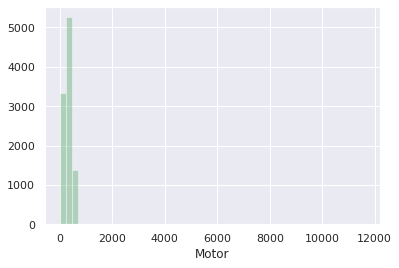

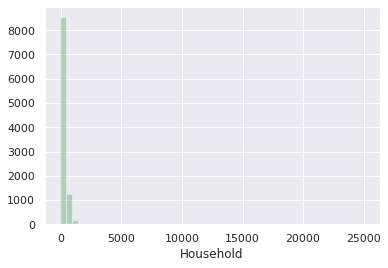

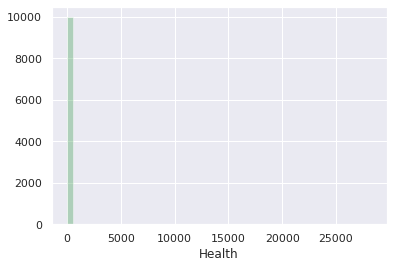

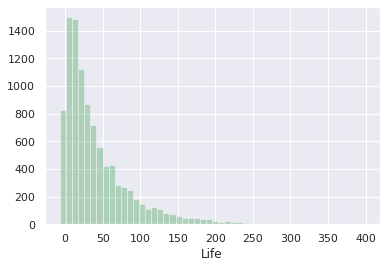

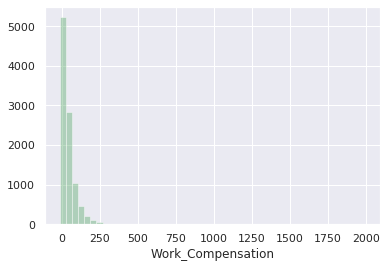

In [239]:
sns.set_style("darkgrid", {'figure.facecolor':'green',
                         'axes.axisbelow':False,
                         'axes.facecolor':'#ee1289'})
sns.set()

col = ['First_Policy', 'Birthday', 'Salary', 'CMV', 'Claims', 'Motor', 'Household', 'Health', 'Life', 'Work_Compensation']

for col in col:
    sns.distplot(df[col], kde_kws={"color": "k", "lw": 2, "label": "KDE"}, kde=False, color = 'g', bins = 50, rug = False)
    plt.show()
    

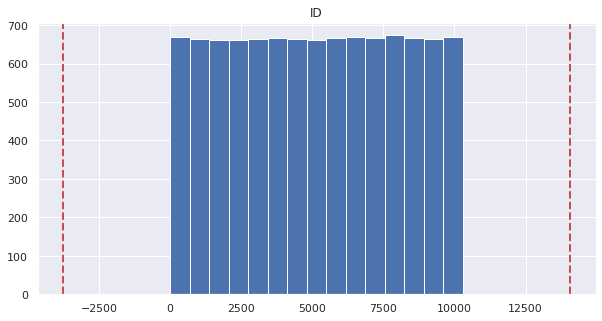

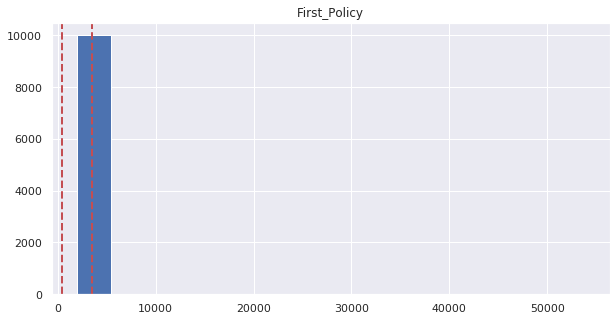

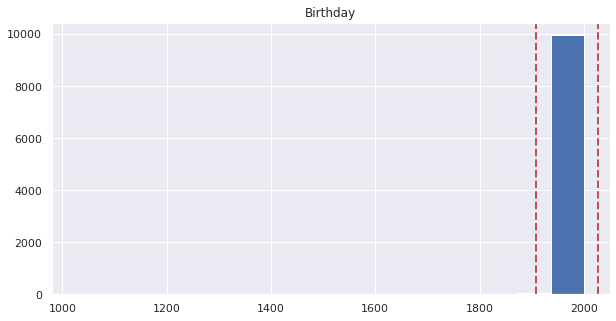

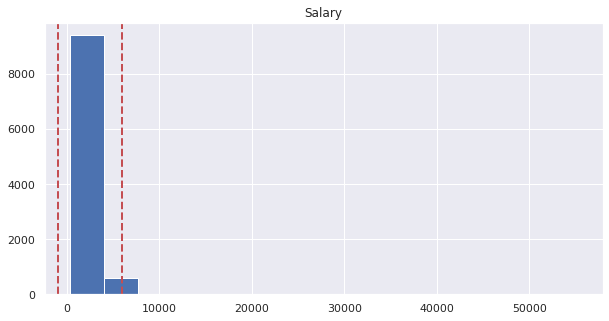

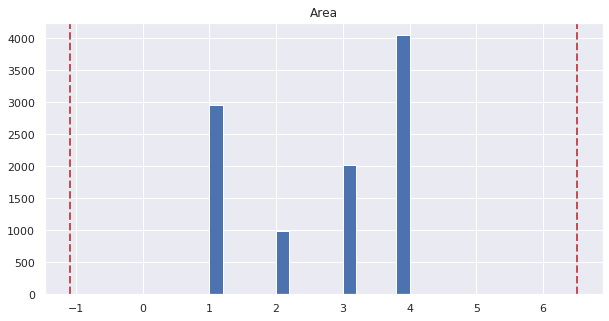

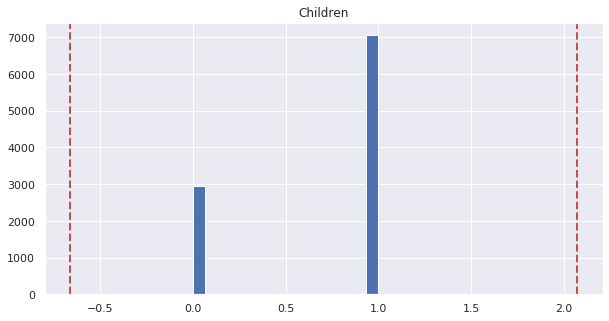

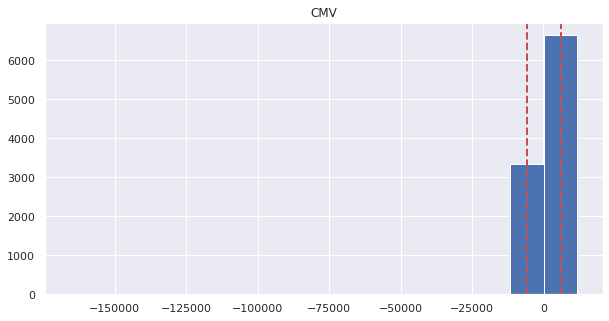

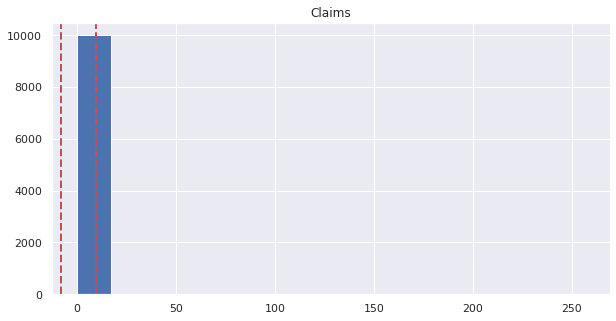

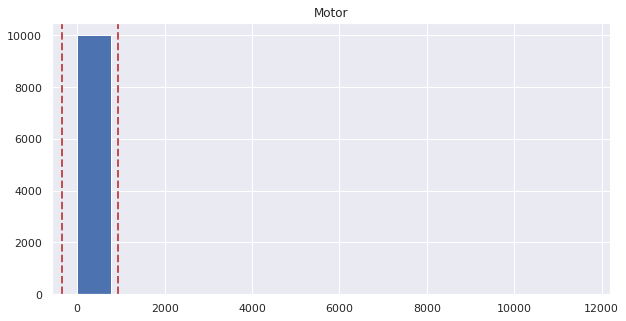

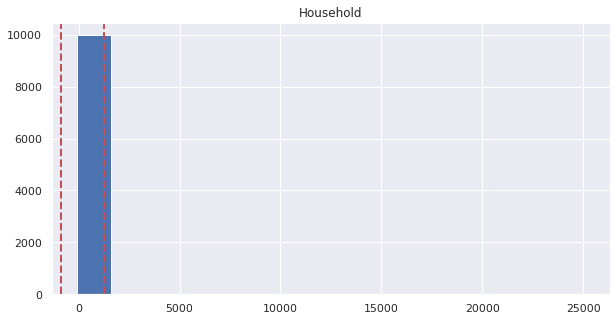

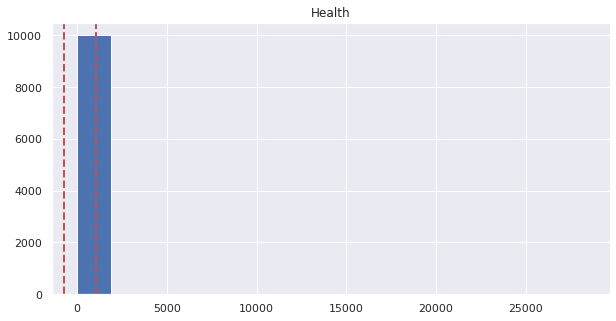

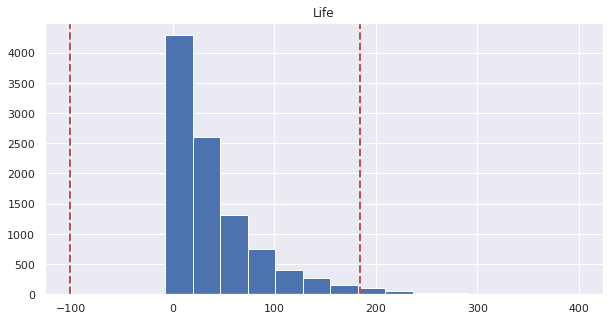

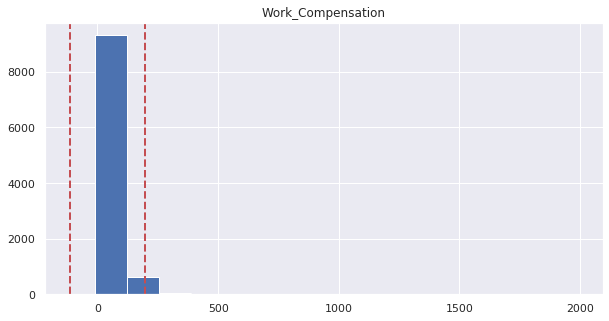

In [227]:
# Detecting outliers with the z-score method
def col_outlier(df, threshold=3.0):
    #path_timeseries = pathlib.Path('/home/mle5fe/projects/project_zero_bup/py_project_zero_bup/src/py_project_zero_bup/mle5fe/DQcheck/images_zscore').mkdir(parents=True, exist_ok=True) 
    #path_image = {}
    outlier_counts = {}
    lower_limits = {}
    upper_limits = {}
    for i, col in enumerate(df._get_numeric_data()):
        y = df[col]
        mean_col = np.mean(y)
        std_col = np.std(y) 
        z_score = (y - mean_col)/std_col 
        is_outlier = np.abs(z_score) > threshold
        outlier_counts = np.sum(is_outlier)
        lower_limits = mean_col - std_col*threshold
        upper_limits = mean_col + std_col*threshold
        fig, axes = plt.subplots(figsize=(10, 5))
        hist_large = df[col].hist(bins=15)
        hist_large.set_title(col)
        plt.axvline(lower_limits, color='r', linestyle='dashed', linewidth=2)
        plt.axvline(upper_limits, color='r', linestyle='dashed', linewidth=2)
        #path = 'images_zscore/' + col + '.png'
        #plt.savefig(path)
        #path_image[col] = path
    return hist_large

col_outlier(df)

Distplots

In [234]:
sns.set_style("ticks")
# 'customer_id','first_policy_year', 'birthday_year', 'educational_degree', 'gross_monthly_salary', 'geographic_living_area', 'customer_monetary_value', 'claims_rate', 
sns.pairplot(df[['premiums_LOB_motor', 'premiums_LOB_household', 'premiums_LOB_health', 'premiums_LOB_life', 'premiums_LOB_work_compensations']],
            diag_kind='hist',
            kind='scatter',
            palette='husl',
            plot_kws={'alpha':0.6,
                     's':0.6,
                     'edgecolor':'k'},
            height=2)
plt.show()

KeyError: "None of [Index(['premiums_LOB_motor', 'premiums_LOB_household', 'premiums_LOB_health',\n       'premiums_LOB_life', 'premiums_LOB_work_compensations'],\n      dtype='object')] are in the [columns]"

Optimum number of clusters

In [33]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df)
    wcss.append(km.inertia_)
plt.plot(range(11,1),wcss)
plt.title('Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

ValueError: could not convert string to float: '4 - PhD'

IQR Boxplot

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_new = df_boxplot[~((df_boxplot < (Q1 - 1.5*IQR)) | (df_boxplot > (Q3 - 1.5*IQR))).any(axis=1)]
# the output is the IQR for each column

In [ ]:
df_new.shape